Best position found: [2.00000034 1.99999981]
Minimum value: -3.999999999999843


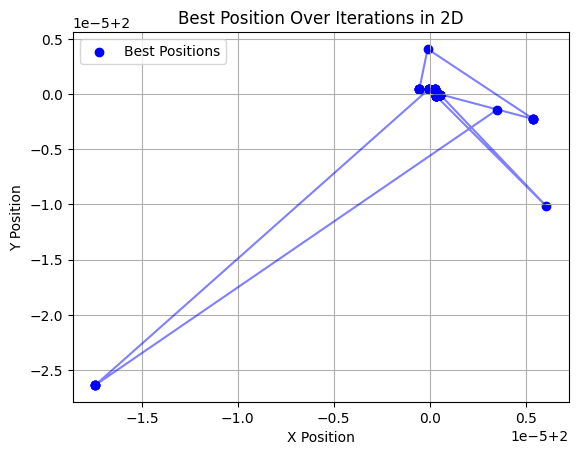

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi yang akan diminimalkan
def objective_function(x, y):
    return (x**2 + y**2) - 4*x - 4*y + 4

# Parameter PSO
num_particles = 30  # Jumlah partikel
num_iterations = 50  # Jumlah iterasi
w = 0.5  # Koefisien inersia
c1 = 1.5  # Koefisien akselerasi untuk pBest
c2 = 1.5  # Koefisien akselerasi untuk gBest

# Inisialisasi posisi dan kecepatan partikel secara acak
np.random.seed(0)  # Untuk reproduktifitas
positions = np.random.rand(num_particles, 2) * 10  # Posisi acak di [0, 10] untuk x dan y
velocities = np.random.rand(num_particles, 2) - 0.5  # Kecepatan acak di [-0.5, 0.5] untuk x dan y

# Inisialisasi pBest dan gBest
pBest = positions.copy()
pBest_values = np.array([objective_function(pos[0], pos[1]) for pos in pBest])
gBest_index = np.argmin(pBest_values)
gBest = pBest[gBest_index]

# Simpan nilai untuk plot
best_values = []

# Iterasi PSO
for iteration in range(num_iterations):
    for i in range(num_particles):
        # Hitung nilai fitness untuk partikel
        fitness = objective_function(positions[i][0], positions[i][1])

        # Update pBest
        if fitness < pBest_values[i]:
            pBest[i] = positions[i]
            pBest_values[i] = fitness

    # Update gBest
    gBest_index = np.argmin(pBest_values)
    gBest = pBest[gBest_index]

    # Simpan nilai terbaik di setiap iterasi
    best_values.append(gBest)

    # Update kecepatan dan posisi
    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pBest[i] - positions[i]) +
                         c2 * r2 * (gBest - positions[i]))
        positions[i] += velocities[i]

# Hasil akhir
print(f"Best position found: {gBest}")
print(f"Minimum value: {objective_function(gBest[0], gBest[1])}")

# Plot pergerakan nilai terbaik
best_values = np.array(best_values)
plt.scatter(best_values[:, 0], best_values[:, 1], color='blue', marker='o', label='Best Positions')
plt.plot(best_values[:, 0], best_values[:, 1], color='blue', alpha=0.5)
plt.title("Best Position Over Iterations in 2D")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()
